# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 1: <font color=blue>Linear Regression</font>

## <font color=green>Linear regression with multiple variables</font>
>In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
>The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set()

In [2]:
data1 = pd.read_csv("linearReg-ex1dat2.csv",names=['Size','Bedrooms','Price'])

In [3]:
#data1 = pd.DataFrame(ex1data2,columns=['Size','Bedrooms','Price'])
data1.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


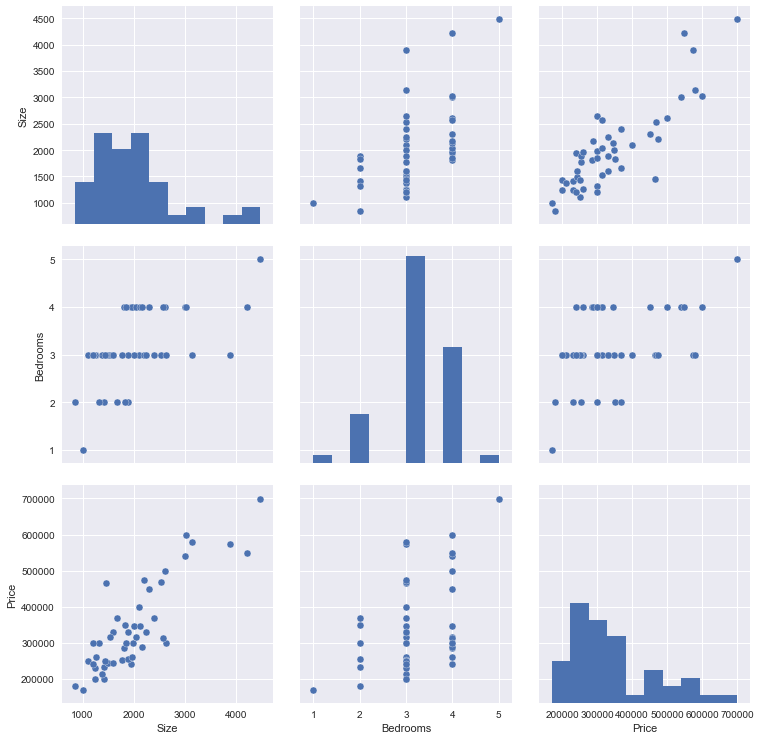

In [4]:
#plot of the Data
fig = plt.figure(figsize=(16,8))
sns.pairplot(data1,size=3.5)

### Feature Normalization

In [5]:
muSize = np.mean(data1.Size.values)
muBedrooms = np.mean(data1.Bedrooms.values)
stdSize = np.std(data1.Size.values)
stdBedrooms = np.std(data1.Bedrooms.values)
#actual normalization
normSize = (data1.Size - muSize)/stdSize
normBedrooms = (data1.Bedrooms - muBedrooms)/stdBedrooms
#number of trainig examples
m = np.size(data1.Size)

### Cost Function and Batch Gradient Descent

In [6]:
# Hypothesis function: h = theta_0*x1 + theta_1*x2 + theta_2*X3
theta = np.transpose(np.matrix([0.0,0.0,0.0])) # initialization of theta matrix
#xMat = np.transpose(np.matrix((np.ones(97),data1.Population.values))) # initialization of the X matrix
xMat = np.c_[np.ones(m),normSize,normBedrooms] # same as previous line
yMat = np.transpose(np.matrix([data1.Price.values])) # initialization  of the y matrix
#print(theta)
#print(xMat)
#print(yMat)

In [7]:
# Compute the Cost Function J(theta)
#m = data1.Population.size #number of training example
J = [] # The cost function as a vector
error = (xMat @ theta) - yMat # What goes into the sum of the cost functionJ
J = (1/(2*m))*np.sum(np.square(error.T))
#print(J)

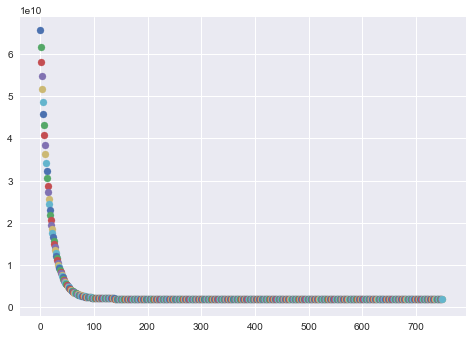

In [8]:
# Performe the batch gradient descent
#
# define the alpha parameters and number of iterations
alpha = 0.03
nIter = 750

#theta = np.transpose(np.matrix([-0.5,0.8]))
%timeit 
for i in range(nIter):
    error = (xMat @ theta) - yMat # What goes into the sum of the cost functionJ
    #vectorization of the gradient
    gradient = (alpha/m) * (error.T @ xMat)
    theta = theta - gradient.T
    #theta = theta_tmp
    #print(theta)
    J = (1/(2*m))*np.sum(np.square(error.T))
    #print(J)   
    plt.scatter(i,J)
#print(theta)

### Results of the Algorithm

In [9]:
# Results of the Machine Learning Linear Model
results = xMat @ theta
#print(results)
# What is the size of your house and how many bedrooms ?
x_size = 1650
x_size_norm = (x_size-muSize)/stdSize
x_bedroom = 3
x_bedroom_norm = (3-muBedrooms)/stdBedrooms
my_price = theta[0] + x_size_norm*theta[1] + x_bedroom_norm*theta[2]
#print(my_profit[0,0])
print('The Algortihm gives the following hypothesis function:')
print('h = ',theta[0,0],' + ',theta[1,0],'times x',' + ',theta[2,0],'times x')
print('According to the size and number of bedrooms, my house price would be ',my_price[0,0], '$')

The Algortihm gives the following hypothesis function:
h =  340412.6595336543  +  109445.0734125282 times x  +  -6575.631797047671 times x
According to the size and number of bedrooms, my house price would be  293082.06323183625 $


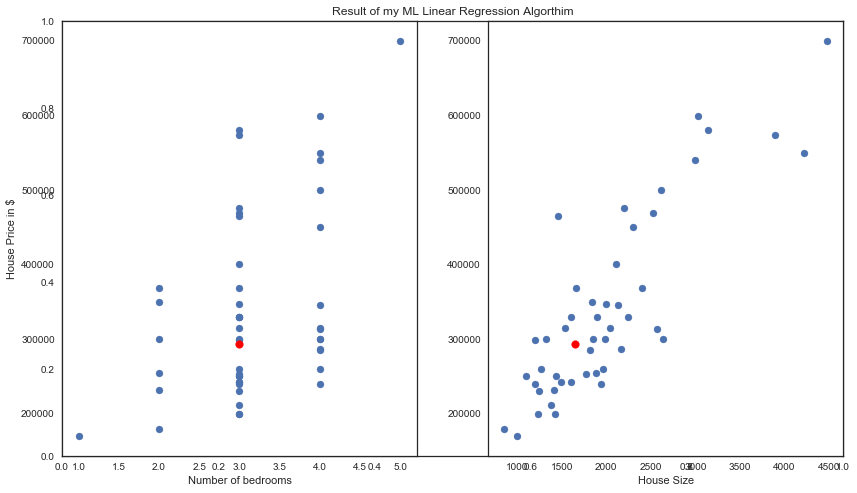

In [10]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(14,8))
plt.title('Result of my ML Linear Regression Algorthim')
#firstplot
fig.add_subplot(1,2,1)
plt.scatter(data1.Bedrooms,data1.Price)
plt.scatter(x_bedroom,my_price[0,0],s = 60,c='red')
plt.xlabel('Number of bedrooms')
plt.ylabel('House Price in $')
#secondplot
fig.add_subplot(1,2,2)
plt.scatter(data1.Size,data1.Price)
plt.scatter(x_size,my_price[0,0],s = 60,c='red')
plt.xlabel('House Size')
#

## <font color=green>Analytic Resolution via the Normal Equation </font>
>In this part, the problem is the same but we use the analytic resolution

In [11]:
newtheta = np.linalg.inv(xMat.T @ xMat) @ xMat.T @ yMat

In [12]:
# What is the size of your house and how many bedrooms ?
x_size = 1650
x_size_norm = (x_size-muSize)/stdSize
x_bedroom = 3
x_bedroom_norm = (3-muBedrooms)/stdBedrooms
my_NEq_price = newtheta[0] + x_size_norm*newtheta[1] + x_bedroom_norm*newtheta[2]
#print(my_profit[0,0])
print('The Algortihm gives the following hypothesis function:')
print('h = ',newtheta[0,0],' + ',newtheta[1,0],'times x',' + ',newtheta[2,0],'times x')
print('According to the size and number of bedrooms, my house price would be ',my_NEq_price[0,0], '$')

The Algortihm gives the following hypothesis function:
h =  340412.65957446815  +  109447.79646964182 times x  +  -6578.354854161258 times x
According to the size and number of bedrooms, my house price would be  293081.4643348962 $


## <font color=green>Resolution via the Scikit-learn module </font>
>In this part, the problem is the same but we use the Scikit module

In [13]:
from sklearn.linear_model import LinearRegression

In [17]:
x = xMat
y = yMat
reg = LinearRegression().fit(x,y)
reg.score(x,y)
sktheta = [reg.intercept_[0],reg.coef_[0,1],reg.coef_[0,2]]
#sktheta

In [15]:
# What is the size of your house and how many bedrooms ?
x_size = 1650
x_size_norm = (x_size-muSize)/stdSize
x_bedroom = 3
x_bedroom_norm = (3-muBedrooms)/stdBedrooms
my_sk_price = sktheta[0] + x_size_norm*sktheta[1] + x_bedroom_norm*sktheta[2]
#print(my_profit[0,0])
print('The Algortihm gives the following hypothesis function:')
print('h = ',sktheta[0],' + ',sktheta[1],'times x',' + ',sktheta[2],'times x')
print('According to the size and number of bedrooms, my house price would be ',my_sk_price, '$')

The Algortihm gives the following hypothesis function:
h =  340412.6595744681  +  109447.7964696417 times x  +  -6578.354854161298 times x
According to the size and number of bedrooms, my house price would be  293081.4643348962 $


## <font color=red> Comparison of the different algorithms </font>

In [16]:
res = pd.DataFrame(sktheta,columns=['scikit'])
res['normal eq'] = [newtheta[0,0],newtheta[1,0],newtheta[2,0]]
res['gradient descent'] = [theta[0,0],theta[1,0],theta[2,0]]
res 

,scikit,normal eq,gradient descent
0,340412.659574,340412.659574,340412.659534
1,109447.796470,109447.796470,109445.073413
2,-6578.354854,-6578.354854,-6575.631797
